In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
import tensorflow.keras.datasets.cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
y_train.shape

(50000,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
cnn1 = Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation="softmax")])

In [11]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [13]:
history = cnn1.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3703 - accuracy: 0.5079 - val_loss: 1.0416 - val_accuracy: 0.6323
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9242 - accuracy: 0.6771 - val_loss: 0.8344 - val_accuracy: 0.7130
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7624 - accuracy: 0.7354 - val_loss: 0.7905 - val_accuracy: 0.7254
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6593 - accuracy: 0.7713 - val_loss: 0.7981 - val_accuracy: 0.7280
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5762 - accuracy: 0.7981 - val_loss: 0.7560 - val_accuracy: 0.7450
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5003 - accuracy: 0.8251 - val_loss: 0.7561 - val_accuracy: 0.7516
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4393 - accuracy: 0.8459 - val_loss: 0.8060 -

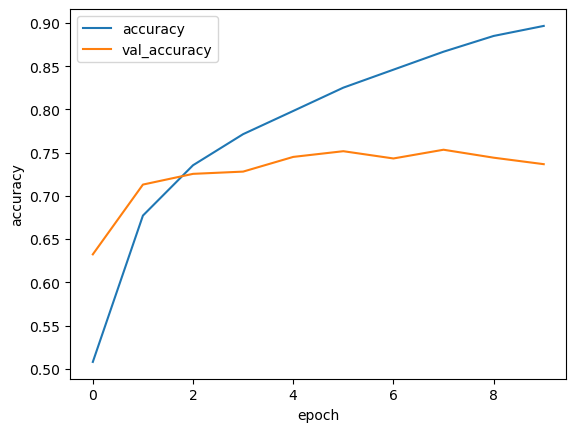

In [14]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="upper left")
plt.show()

In [15]:
test_loss, test_acc = cnn1.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9305 - accuracy: 0.7366


In [16]:
print(f"test accuracy: {test_acc}")

test accuracy: 0.7365999817848206


In [25]:
y_pred = cnn1.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [26]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:15]

[3, 8, 8, 0, 6, 5, 1, 6, 3, 1, 4, 9, 5, 7, 9]

In [27]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

In [28]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

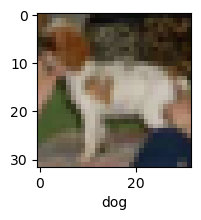

In [29]:
plot_sample(X_test, y_test, 12)

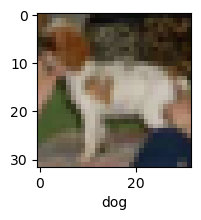

In [30]:
plot_sample(X_test, y_classes, 12)

In [33]:
y_percent = cnn1.predict(X_test)
y_percent_sample = np.argmax(y_percent, axis=1)
print(classification_report(y_test, y_percent))

313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.73      0.81      0.76      1000
           1       0.86      0.88      0.87      1000
           2       0.68      0.61      0.64      1000
           3       0.51      0.65      0.57      1000
           4       0.76      0.61      0.67      1000
           5       0.65      0.62      0.64      1000
           6       0.85      0.69      0.76      1000
           7       0.75      0.82      0.78      1000
           8       0.81      0.88      0.85      1000
           9       0.86      0.80      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

